In [4]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
import pandas as pd
import seaborn as sns

In [5]:

training_set = tf.keras.utils.image_dataset_from_directory(
    'train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 70295 files belonging to 38 classes.


In [6]:

validation_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 17572 files belonging to 38 classes.


In [7]:
cnn = tf.keras.models.Sequential()

In [8]:
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

C:\Users\USER\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:

cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [10]:
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [11]:
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [12]:

cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [13]:

cnn.add(tf.keras.layers.Dropout(0.25))

In [14]:
cnn.add(tf.keras.layers.Flatten())

In [15]:

cnn.add(tf.keras.layers.Dense(units=1500,activation='relu'))

In [16]:
cnn.add(tf.keras.layers.Dropout(0.4)) #To avoid overfitting

In [17]:
#Output Layer
cnn.add(tf.keras.layers.Dense(units=38,activation='softmax'))

In [18]:
from keras.optimizers.legacy import Adam

In [19]:
from keras.optimizers import Adam as AdamV2

In [20]:
cnn.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
            loss='categorical_crossentropy',
            metrics=['accuracy'])

In [21]:
training_history = cnn.fit(x=training_set,validation_data=validation_set,epochs=10)

Epoch 1/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 3208s 1s/step - accuracy: 0.4093 - loss: 2.0945 - val_accuracy: 0.8359 - val_loss: 0.5236
Epoch 2/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 2886s 1s/step - accuracy: 0.8339 - loss: 0.5281 - val_accuracy: 0.9193 - val_loss: 0.2513
Epoch 3/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 2887s 1s/step - accuracy: 0.9030 - loss: 0.2941 - val_accuracy: 0.9339 - val_loss: 0.2038
Epoch 4/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 2900s 1s/step - accuracy: 0.9337 - loss: 0.1984 - val_accuracy: 0.9441 - val_loss: 0.1724
Epoch 5/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 2919s 1s/step - accuracy: 0.9515 - loss: 0.1472 - val_accuracy: 0.9599 - val_loss: 0.1308
Epoch 6/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 2963s 1s/step - accuracy: 0.9618 - loss: 0.1148 - val_accuracy: 0.9591 - val_loss: 0.1309
Epoch 7/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 3004s 1s/step - accuracy: 0.9700 - loss: 0.0915 - val_accuracy: 0.9574 - val_loss: 0.1416
Epoch 8/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 2942s 1s/step - accuracy: 0.9739 -

# Validation

In [25]:
train_loss, train_acc = cnn.evaluate(training_set)
print('Training accuracy:', train_acc)

2197/2197 ━━━━━━━━━━━━━━━━━━━━ 761s 346ms/step - accuracy: 0.9919 - loss: 0.0231
Training accuracy: 0.9931005239486694


In [26]:
val_loss, val_acc = cnn.evaluate(validation_set)
print('Validation accuracy:', val_acc)

550/550 ━━━━━━━━━━━━━━━━━━━━ 192s 350ms/step - accuracy: 0.9654 - loss: 0.1197
Validation accuracy: 0.9655702114105225


In [30]:
cnn.save("trained_model.keras")

In [31]:
training_history.history #Return Dictionary of history

{'accuracy': [0.6031723618507385,
  0.8561490774154663,
  0.912781834602356,
  0.9395689368247986,
  0.9552457332611084,
  0.9645351767539978,
  0.9721601605415344,
  0.975986897945404,
  0.9786756038665771,
  0.9804537892341614],
 'loss': [1.347876787185669,
  0.4539080262184143,
  0.2653309404850006,
  0.18398426473140717,
  0.1379816234111786,
  0.10866846889257431,
  0.087089404463768,
  0.07454318553209305,
  0.06440576165914536,
  0.059640780091285706],
 'val_accuracy': [0.8358752727508545,
  0.9193034172058105,
  0.9339289665222168,
  0.9440587162971497,
  0.959936261177063,
  0.9590826034545898,
  0.9574322700500488,
  0.9602777361869812,
  0.9366605877876282,
  0.9655702114105225],
 'val_loss': [0.523596465587616,
  0.2512786090373993,
  0.20377564430236816,
  0.1724388599395752,
  0.1308104693889618,
  0.1308673918247223,
  0.14156121015548706,
  0.1328098475933075,
  0.23222734034061432,
  0.11958900094032288]}

In [32]:
#Recording History in json
import json
with open('training_hist1.json','w') as f:
  json.dump(training_history.history,f)

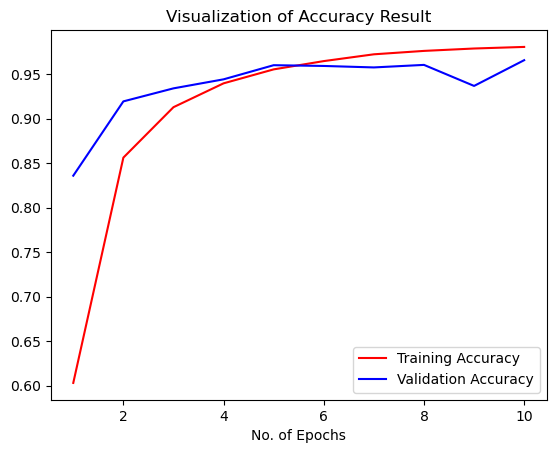

In [33]:
epochs = [i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.title('Visualization of Accuracy Result')
plt.legend()
plt.show()

In [34]:
class_name = validation_set.class_names

In [35]:
test_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=1,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 17572 files belonging to 38 classes.


In [36]:
y_pred = cnn.predict(test_set)
predicted_categories = tf.argmax(y_pred, axis=1)

17572/17572 ━━━━━━━━━━━━━━━━━━━━ 609s 35ms/step


In [37]:
true_categories = tf.concat([y for x, y in test_set], axis=0)
Y_true = tf.argmax(true_categories, axis=1)

In [38]:
Y_true

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

In [39]:
predicted_categories

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

In [40]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(Y_true,predicted_categories)

In [41]:
# Precision Recall Fscore
print(classification_report(Y_true,predicted_categories,target_names=class_name))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.95      0.98      0.96       504
                                 Apple___Black_rot       0.97      0.99      0.98       497
                          Apple___Cedar_apple_rust       0.96      1.00      0.98       440
                                   Apple___healthy       0.97      0.98      0.97       502
                               Blueberry___healthy       0.98      0.97      0.97       454
          Cherry_(including_sour)___Powdery_mildew       1.00      0.98      0.99       421
                 Cherry_(including_sour)___healthy       0.97      1.00      0.98       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.98      0.81      0.89       410
                       Corn_(maize)___Common_rust_       0.98      0.99      0.99       477
               Corn_(maize)___Northern_Leaf_Blight       0.88      0.98      0.

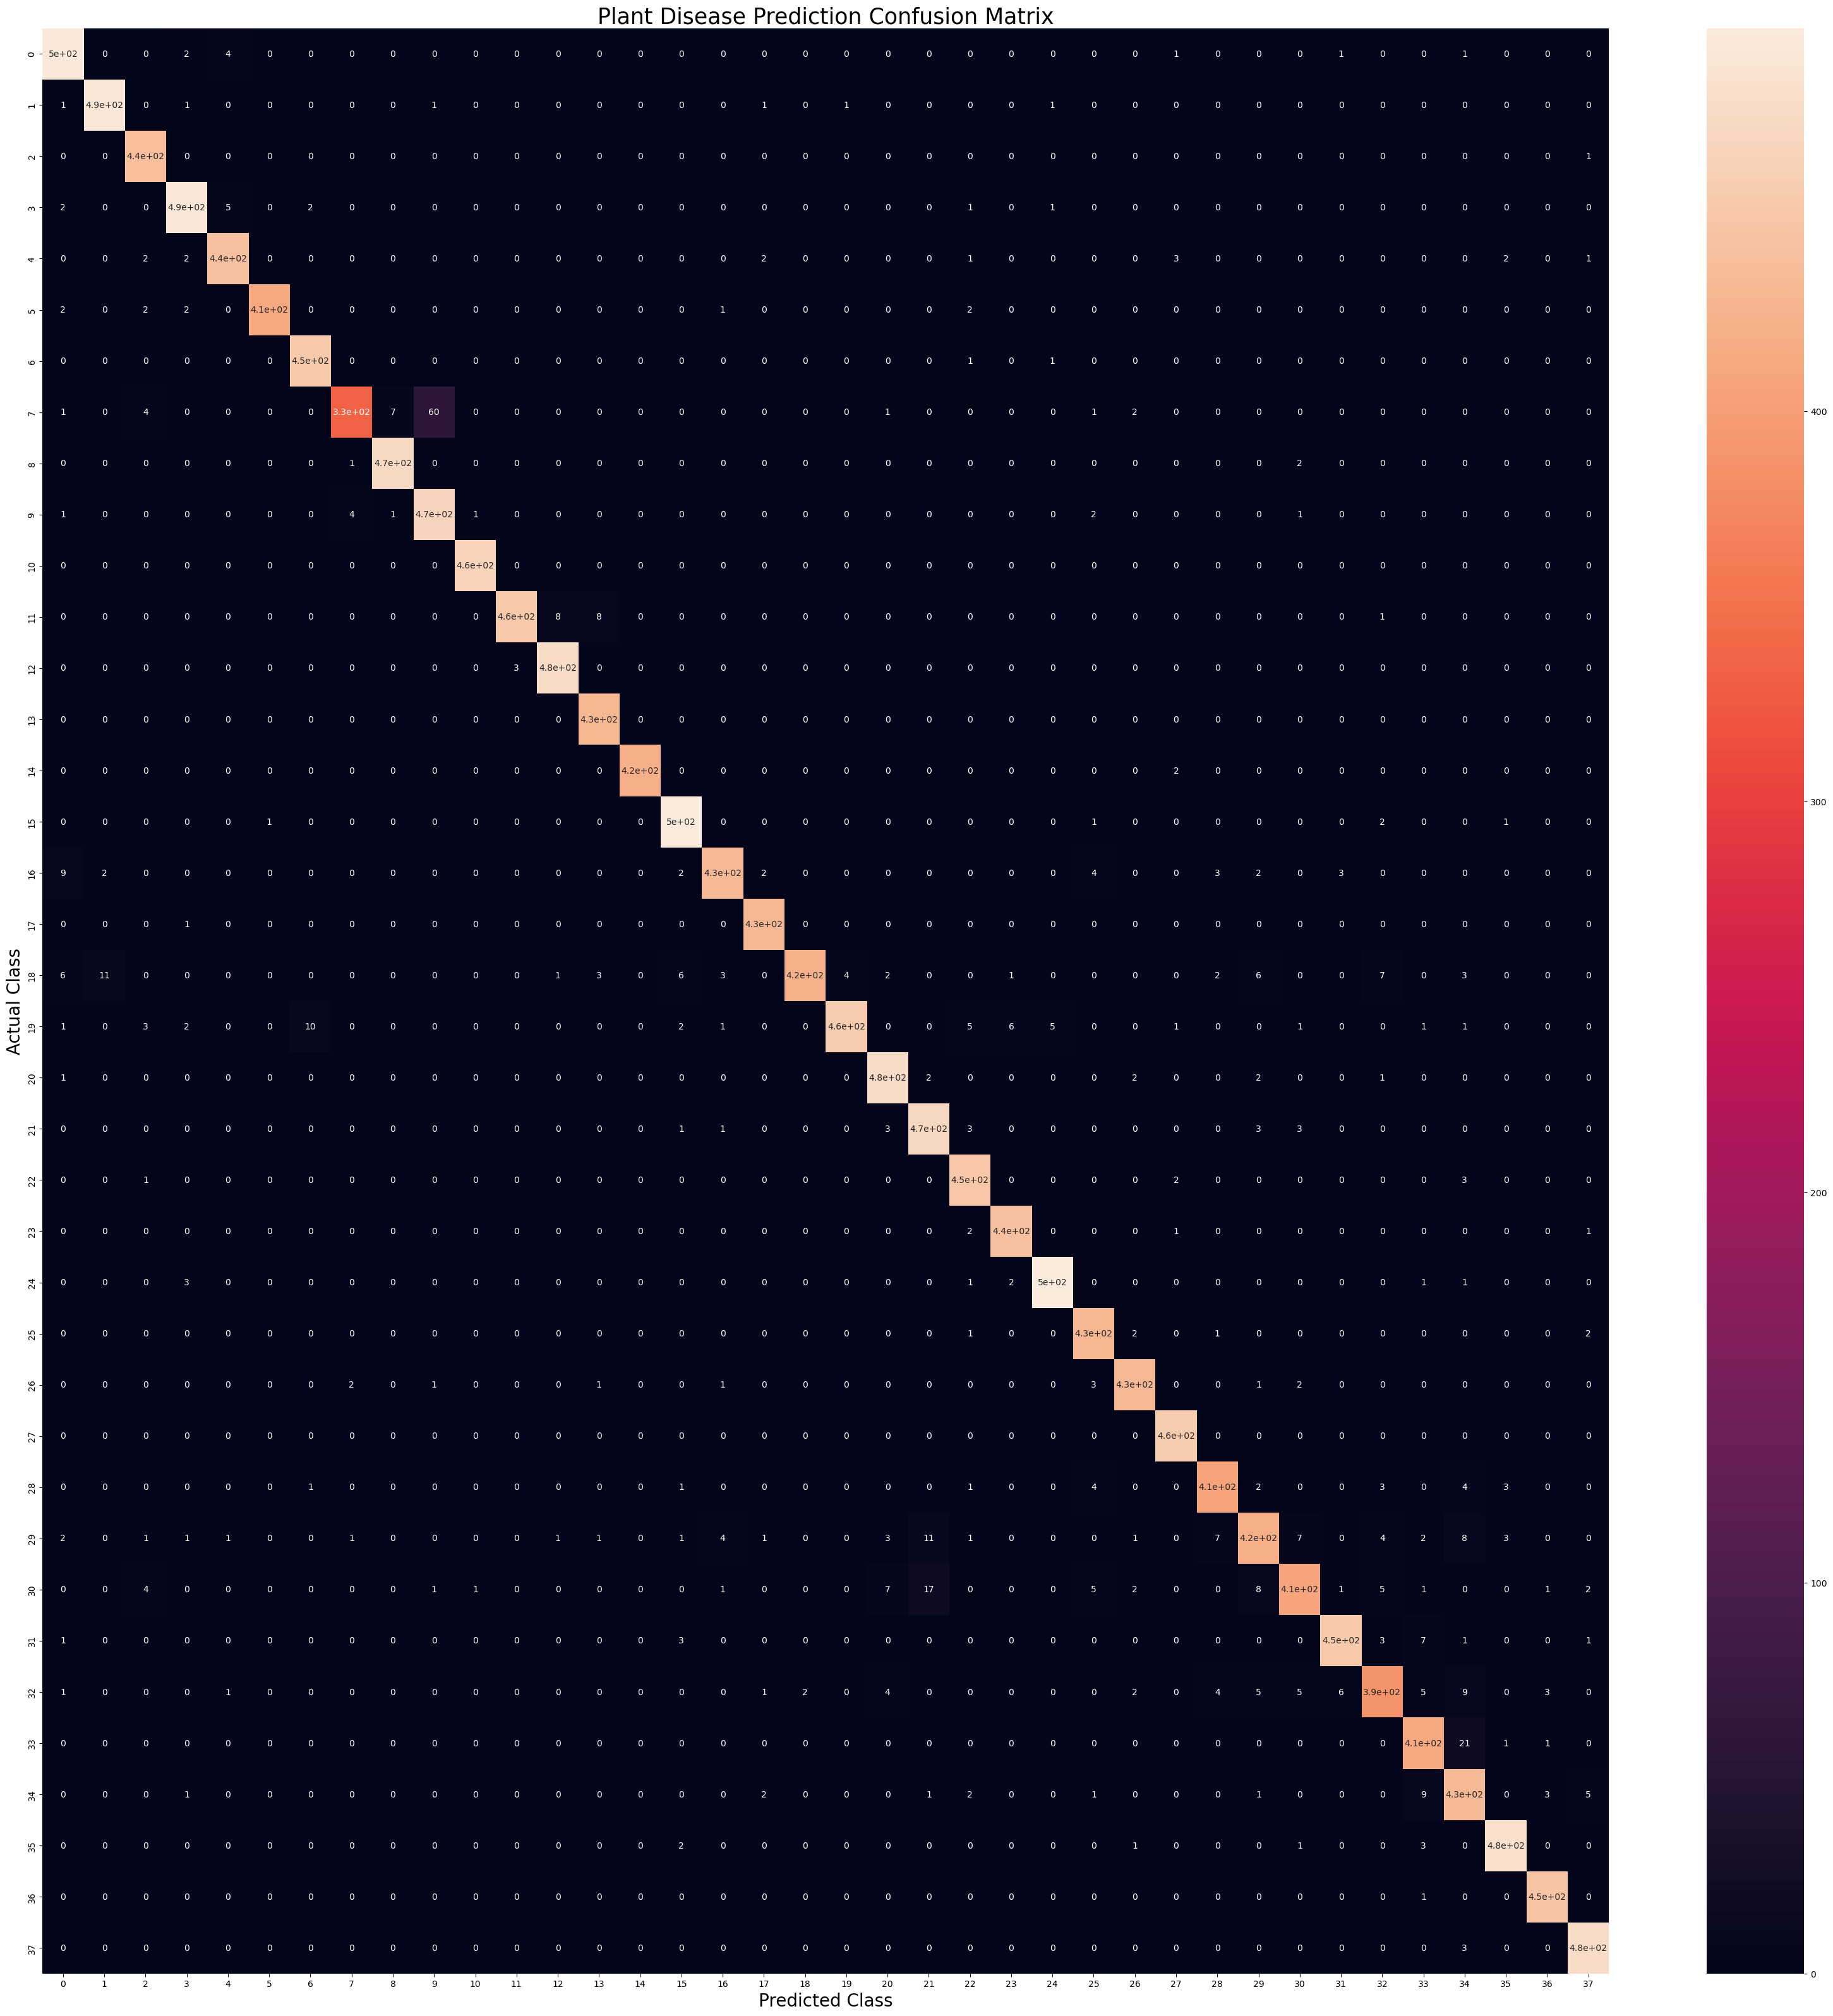

In [42]:
plt.figure(figsize=(40, 40))
sns.heatmap(cm,annot=True,annot_kws={"size": 10})

plt.xlabel('Predicted Class',fontsize = 20)
plt.ylabel('Actual Class',fontsize = 20)
plt.title('Plant Disease Prediction Confusion Matrix',fontsize = 25)
plt.show()